In [ ]:
# This data set contains 13 clinicopathologic features aiming to predict recurrence of well differentiated thyroid cancer.
# The data set was collected in duration of 15 years and each patient was followed for at least 10 years.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data=pd.read_csv("Thyroid_Diff.csv")
data

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,72,M,Yes,Yes,Yes,Euthyroid,Single nodular goiter-right,Right,Papillary,Uni-Focal,High,T4b,N1b,M1,IVB,Biochemical Incomplete,Yes
379,81,M,Yes,No,Yes,Euthyroid,Multinodular goiter,Extensive,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
380,72,M,Yes,Yes,No,Euthyroid,Multinodular goiter,Bilateral,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
381,61,M,Yes,Yes,Yes,Clinical Hyperthyroidism,Multinodular goiter,Extensive,Hurthel cell,Multi-Focal,High,T4b,N1b,M0,IVA,Structural Incomplete,Yes


In [ ]:
data.isnull().sum()

,0
Age,0
Gender,0
Smoking,0
Hx Smoking,0
Hx Radiothreapy,0
Thyroid Function,0
Physical Examination,0
Adenopathy,0
Pathology,0
Focality,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   383 non-null    int64 
 1   Gender                383 non-null    object
 2   Smoking               383 non-null    object
 3   Hx Smoking            383 non-null    object
 4   Hx Radiothreapy       383 non-null    object
 5   Thyroid Function      383 non-null    object
 6   Physical Examination  383 non-null    object
 7   Adenopathy            383 non-null    object
 8   Pathology             383 non-null    object
 9   Focality              383 non-null    object
 10  Risk                  383 non-null    object
 11  T                     383 non-null    object
 12  N                     383 non-null    object
 13  M                     383 non-null    object
 14  Stage                 383 non-null    object
 15  Response              383 non-null    ob

In [ ]:
data.columns.to_list()


['Age',
 'Gender',
 'Smoking',
 'Hx Smoking',
 'Hx Radiothreapy',
 'Thyroid Function',
 'Physical Examination',
 'Adenopathy',
 'Pathology',
 'Focality',
 'Risk',
 'T',
 'N',
 'M',
 'Stage',
 'Response',
 'Recurred']

In [ ]:
data.nunique()

,0
Age,65
Gender,2
Smoking,2
Hx Smoking,2
Hx Radiothreapy,2
Thyroid Function,5
Physical Examination,5
Adenopathy,6
Pathology,4
Focality,2


In [ ]:
data['Recurred'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
#EDA

In [ ]:
gender=data.Gender.value_counts()
gender

,count
Gender,
F,312
M,71


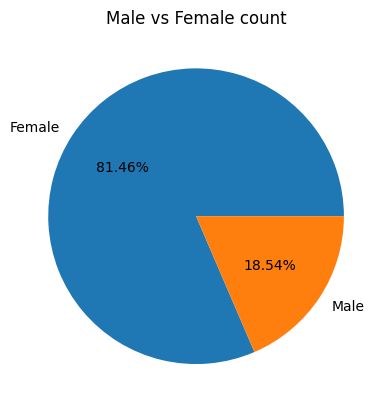

In [ ]:
plt.pie(gender,labels=['Female','Male'],autopct='%.2f%%')
plt.title('Male vs Female count')
plt.show()

In [ ]:
smoking=data.Smoking.value_counts()
smoking



,count
Smoking,
No,334
Yes,49


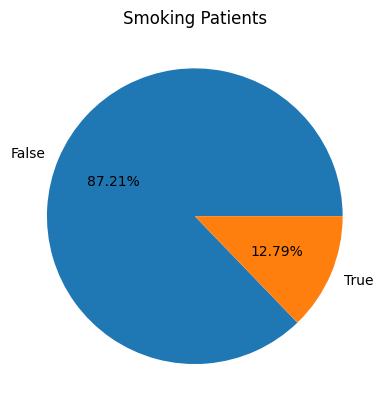

In [ ]:
plt.pie(smoking,labels=['False','True'],autopct='%.2f%%')
plt.title('Smoking Patients')
plt.show()

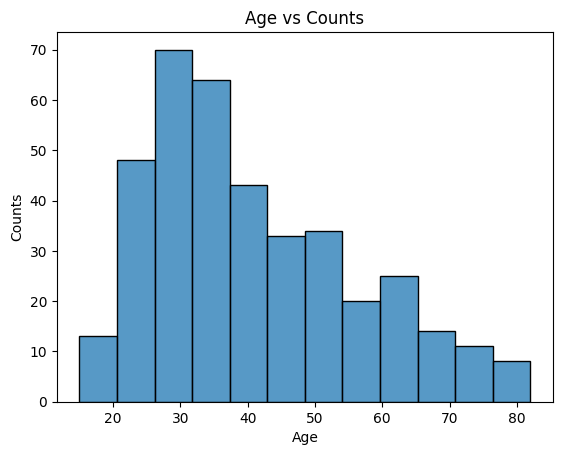

In [ ]:
sns.histplot(data['Age'])
plt.xlabel('Age')
plt.ylabel('Counts')
plt.title('Age vs Counts')
plt.show()

<Axes: xlabel='Hx Radiothreapy', ylabel='Risk'>

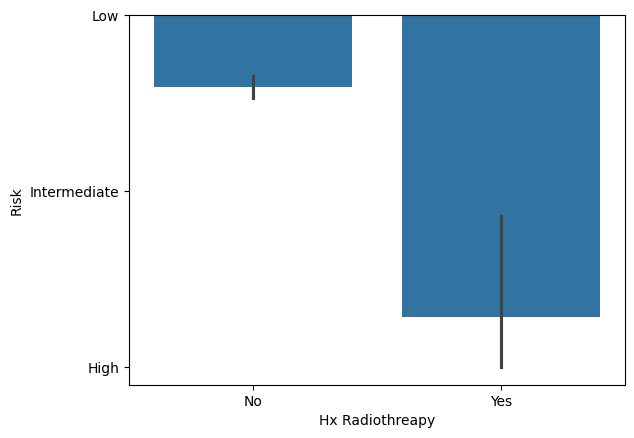

In [ ]:
sns.barplot(x=data['Hx Radiothreapy'],y=data['Risk'])

Text(0, 0.5, 'Count')

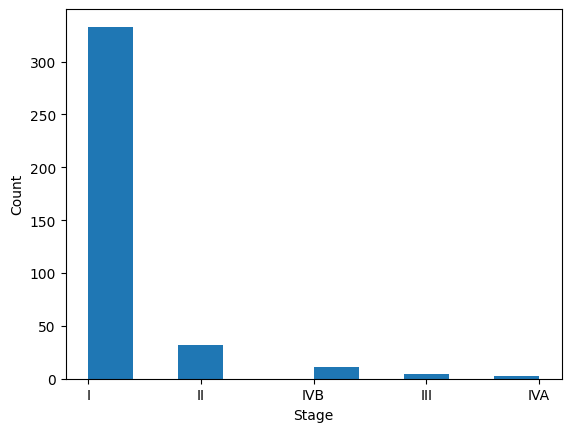

In [ ]:
data['Stage'].hist()
plt.grid()
plt.xlabel('Stage')
plt.ylabel('Count')

In [ ]:
# Model training

In [ ]:
data.columns.to_list()

['Age',
 'Gender',
 'Smoking',
 'Hx Smoking',
 'Hx Radiothreapy',
 'Thyroid Function',
 'Physical Examination',
 'Adenopathy',
 'Pathology',
 'Focality',
 'Risk',
 'T',
 'N',
 'M',
 'Stage',
 'Response',
 'Recurred']

In [ ]:
le=LabelEncoder()
data['Gender']=le.fit_transform(data['Gender'])
data['Hx Radiothreapy']=le.fit_transform(data['Hx Radiothreapy'])
data['Stage']=le.fit_transform(data['Stage'])
data['Recurred']=le.fit_transform(data['Recurred'])
data['Adenopathy']=le.fit_transform(data['Adenopathy'])
data['Pathology']=le.fit_transform(data['Pathology'])
data['Hx Smoking']=le.fit_transform(data['Hx Smoking'])
data['M']=le.fit_transform(data['M'])
data['T']=le.fit_transform(data['T'])
data['N']=le.fit_transform(data['N'])
data['Physical Examination']=le.fit_transform(data['Physical Examination'])
data['Risk']=le.fit_transform(data['Risk'])
data['Smoking']=le.fit_transform(data['Smoking'])
data['Thyroid Function']=le.fit_transform(data['Thyroid Function'])
data['Focality']=le.fit_transform(data['Focality'])
data['Response']=le.fit_transform(data['Response'])




In [ ]:
x=data.drop('Recurred',axis=1)
y=data['Recurred']


In [ ]:
x

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response
0,27,0,0,0,0,2,3,3,2,1,2,0,0,0,0,2
1,34,0,0,1,0,2,1,3,2,1,2,0,0,0,0,1
2,30,0,0,0,0,2,4,3,2,1,2,0,0,0,0,1
3,62,0,0,0,0,2,4,3,2,1,2,0,0,0,0,1
4,62,0,0,0,0,2,1,3,2,0,2,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,72,1,1,1,1,2,4,5,3,1,0,6,2,1,4,0
379,81,1,1,0,1,2,1,1,3,0,0,6,2,1,4,3
380,72,1,1,1,0,2,1,0,3,0,0,6,2,1,4,3
381,61,1,1,1,1,0,1,1,1,0,0,6,2,0,3,3


In [ ]:
y

,Recurred
0,0
1,0
2,0
3,0
4,0
...,...
378,1
379,1
380,1
381,1


In [ ]:
# Splitting the dataset

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [ ]:
# Cross validation

In [ ]:
log_score=cross_val_score(LogisticRegression(),X=x,y=y,cv=8)
tree_score=cross_val_score(DecisionTreeClassifier(max_depth=3),X=x,y=y,cv=8)
kn_score=cross_val_score(KNeighborsClassifier(n_neighbors=40),X=x,y=y,cv=8)
forest_score=cross_val_score(RandomForestClassifier(n_estimators=300,random_state=42),X=x,y=y,cv=8)
SVC_score=cross_val_score(SVC(),X=x,y=y,cv=8)
Gauss_score=cross_val_score(GaussianNB(),X=x,y=y,cv=8)
ADA_score=cross_val_score(AdaBoostClassifier(n_estimators=55,learning_rate=0.3,random_state=42),X=x,y=y,cv=8)

In [ ]:
print(np.mean(log_score))
print(np.mean(tree_score))
print(np.mean(kn_score))
print(np.mean(forest_score))
print(np.mean(SVC_score))
print(np.mean(Gauss_score))
print(np.mean(ADA_score))

0.8609818262411348
0.8920656028368794
0.7652371453900708
0.9103501773049646
0.7810837765957447
0.8508976063829787
0.9264738475177305


In [ ]:
# Hyperparameter tuning

In [ ]:
model=AdaBoostClassifier()     # Adaboost classifier got highest scores

In [ ]:
gscv=GridSearchCV(model,{'n_estimators':[60,50,40,30,20],
                           'random_state':[10,20,30,42]},
                             cv=5,return_train_score=True)

In [ ]:
gscv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'n_estimators': [60, 50, 40, 30, 20],
                         'random_state': [10, 20, 30, 42]},
             return_train_score=True)

In [ ]:
gs_data=gscv.cv_results_

In [ ]:
data2=pd.DataFrame(gs_data)

In [ ]:
gscv.best_params_

{'n_estimators': 60, 'random_state': 10}

In [ ]:
gscv.best_score_

0.944162129461585

In [ ]:
y_pred=gscv.predict(x_test)

In [ ]:
y_pred

array([0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0])

In [ ]:
df1=pd.DataFrame({'True value': y_test,"predicted value": y_pred})
df1

,True value,predicted value
268,0,0
250,0,0
318,1,1
331,1,1
56,0,0
...,...,...
16,0,0
66,0,0
300,1,0
7,0,0


In [ ]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[66,  2],
       [ 2, 26]])

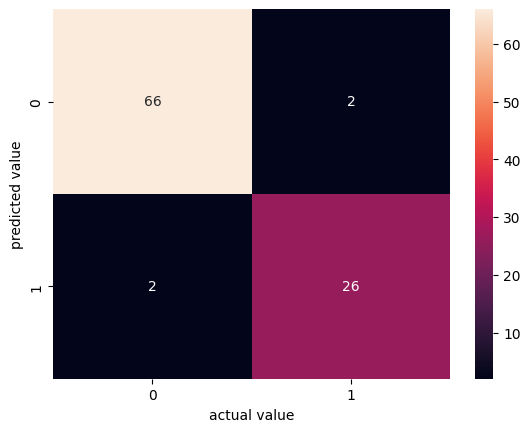

In [ ]:
sns.heatmap(cm,annot=True)
plt.xlabel('actual value')
plt.ylabel('predicted value')
plt.show()

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        68
           1       0.93      0.93      0.93        28

    accuracy                           0.96        96
   macro avg       0.95      0.95      0.95        96
weighted avg       0.96      0.96      0.96        96



In [ ]:
# Conclusion

In [ ]:
data['Recurred'].value_counts()

,count
Recurred,
0,275
1,108


In [ ]:
data['Recurred'].unique()

array([0, 1])

Text(0.5, 1.0, 'Recurrence of Thyroid Cancer')

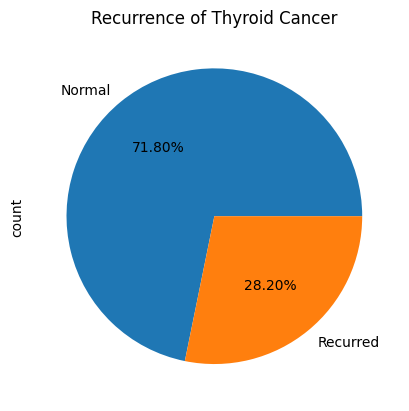

In [ ]:
data['Recurred'].value_counts().plot.pie(autopct='%.2f%%',labels=['Normal','Recurred'])
plt.title('Recurrence of Thyroid Cancer')

Text(0.5, 1.0, 'Recurrence of Condition by Radiotherapy')

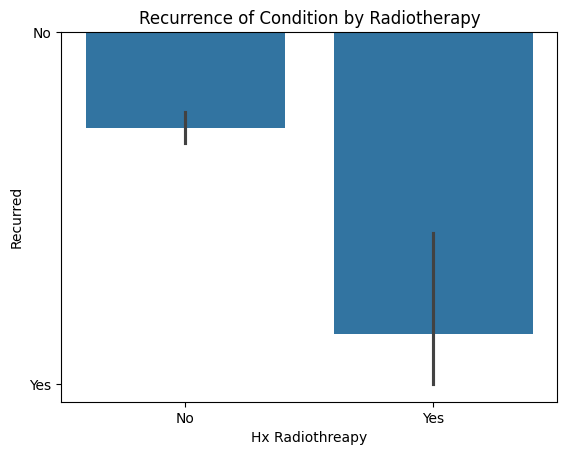

In [ ]:
sns.barplot(x=data['Hx Radiothreapy'],y=data['Recurred'],data=data)
plt.title('Recurrence of Condition by Radiotherapy')

Text(0.5, 1.0, 'Recurrence of Condition by Smoking')

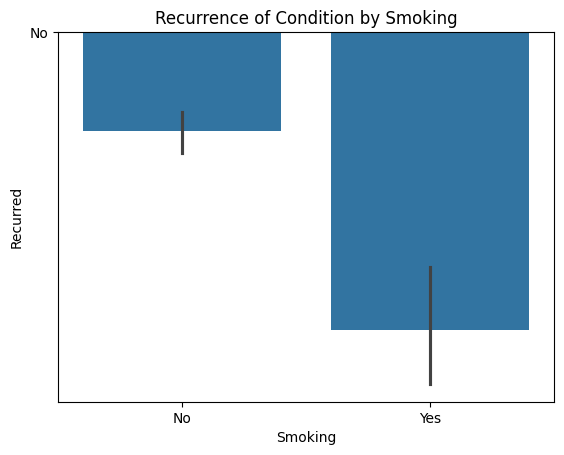

In [ ]:
sns.barplot(x=data['Smoking'],y=data['Recurred'],data=data)
plt.title('Recurrence of Condition by Smoking')

Text(0.5, 1.0, 'Recurrence of Condition by Thyroid Function')

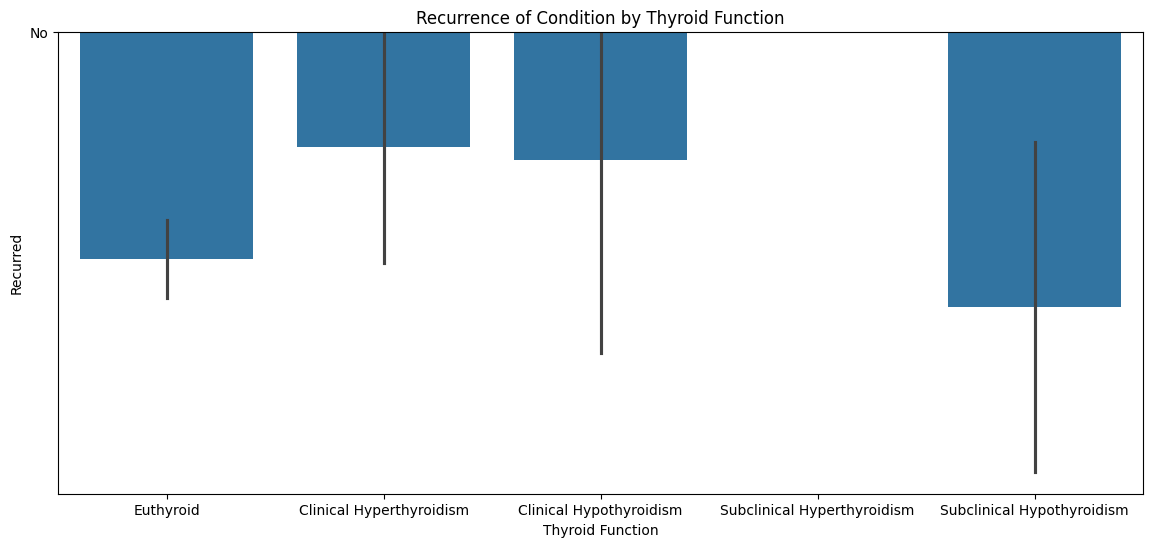

In [ ]:
plt.figure(figsize=(14, 6))
sns.barplot(x=data['Thyroid Function'],y=data['Recurred'],data=data)
plt.title('Recurrence of Condition by Thyroid Function')

In [ ]:
#The Dataset provides valuable insights into how smoking, radiotherapy,
# and other clinical features play role in recurrence of thyroid cancer.
# By analyzing patterns in these features this dataset helps researchers understand what
# influences recurrence of cancer.